In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df2 = pd.read_csv('gender_submission.csv')
df3 = pd.read_csv('test.csv')

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
modeVal =  df.Embarked.mode()[0]
df.Embarked.fillna(modeVal,inplace=True)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [6]:
df['null_cabin'] = np.where(df.Cabin.isnull(),1,0)

In [7]:
df.groupby('Survived')['null_cabin'].mean()

Survived
0    0.876138
1    0.602339
Name: null_cabin, dtype: float64

In [8]:
df['Age'].isnull().sum()

177

### Imputing NaN with Mean/Median/Mode

In [14]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [17]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [12]:
age_median = df.Age.median()
# print(age_median)
df['Age'].fillna(age_median,inplace=True)

In [13]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

## Imputing NaN with Random sampling

In [20]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
df.isnull().sum()   ### for getting the sum of null values
df.isnull().mean() ### For percentage

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [34]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [38]:
def impute_nan(df,variable,median):
    df[f'{variable}_median'] = df[variable].fillna(median)
    df[f'{variable}_random'] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),f'{variable}_random'] = random_sample

In [36]:
median = df.Age.median()
median

28.0

In [39]:
impute_nan(df,'Age',median)

In [40]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


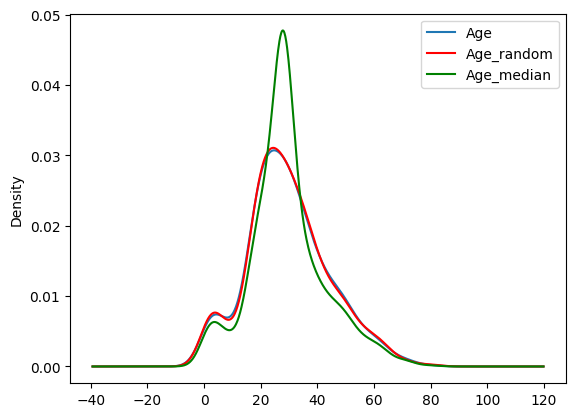

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df['Age_random'].plot(kind='kde',ax=ax,color='red')
df['Age_median'].plot(kind='kde',ax=ax,color='green')
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### Capturing NaN values with addition features

In [3]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df['Age_Null'] = np.where(df['Age'].isnull(),1,0)

In [5]:
df.head()

,Survived,Age,Fare,Age_Null
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [7]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [8]:
df.head(10)

,Survived,Age,Fare,Age_Null
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### End of distribution imputation